# **Lab: Neural Networks**
---
## Exercise 1: Regression

In this lab, we will be working with structured data and train supervised learning architecture.

The dataset we will be using is the famous Boston Housing. Each observation represents a suburb in the region of Boston with related information such as crime rate per capita, average number of rooms or percentage of owner-occupiers.

The data dictionary can be found here: [Boston Housing Data Dictionary](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

This dataset is avalaible directly from TensorFlow: [Tensorflow Documentation on Boston Housing](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing)

Our goal is to build a Neural Network model that can predict accurately the median price of a suburb in Boston (regression task).

The steps are:
1. Setup Repository
2.   Loading and Exploration of the Dataset
3.   Preparing the Dataset
4.   Defining the Architecture of the Multi-Layer Perceptron
5.   Training and Evaluation of the Model
6.   Analysing the Results
7.   Push Changes

### 1. Setup Repository

**[1.1]** Go to a folder of your choice on your computer (where you store projects)

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
cd /Users/anthonyso/Projects/adv_mla_2024

**[1.2]** Copy the cookiecutter data science template

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
cookiecutter -c v1 https://github.com/drivendata/cookiecutter-data-science

Follow the prompt (name the project and repo adv_mla_lab_8)

**[1.3]** Go inside the created folder


In [ ]:
# Placeholder for student's code (command line)

In [ ]:
#Solution:
cd adv_mla_lab_8

**[1.4]** Replace the content of `requirements.txt` with the following content:

```
scikit-learn==1.5.1
pandas==2.2.2
tensorflow-recommenders==0.7.3
wandb==0.17.4
```

**[1.5]** Create a file called `Dockerfile` and add the following content:

```
FROM jupyter/tensorflow-notebook:python-3.11.4

COPY requirements.txt .

RUN pip install -r requirements.txt

ENV PYTHONPATH "${PYTHONPATH}:/home/jovyan/work"

WORKDIR /home/jovyan/work
```


In [ ]:
# Placeholder for student's code (command line)

In [ ]:
#Solution:
vi Dockerfile

**[1.5]** Build the image from this Dockerfile

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
#Solution:
docker build -t tensorflow-jupyter:latest .

Syntax: docker build [OPTIONS] PATH

Options:

`-t: Name and optionally a tag in the 'name:tag' format`

Documentation: https://docs.docker.com/engine/reference/commandline/build/

If you have issues with Apple M1/M2 CPU see [this](https://stackoverflow.com/questions/65456814/docker-apple-silicon-m1-preview-mysql-no-matching-manifest-for-linux-arm64-v8/67361161#67361161)

**[1.6]** Run the built image

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
docker run  -dit --rm --name adv_mla_lab_8 -p 8888:8888 -v ~/Projects/adv_mla_2024/adv_mla_lab_8:/home/jovyan/work/ tensorflow-jupyter:latest

**[1.7]** Display last 50 lines of logs

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
docker logs --tail 50 adv_mla_lab_8

Copy the url displayed and paste it to a browser in order to launch Jupyter Lab

**[1.8]** Initialise the repo

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git init

**[1.9]** Login into Github with your account (https://github.com/) and create a public repo with the name `adv_mla_lab_8`

**[1.10]** In your local repo, link it with Github (replace the url with your username)

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git remote add origin git@github.com:<username>/adv_mla_lab_8

**[1.11]** Add you changes to git staging area and commit them

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git add .
git commit -m "init"

**[1.12]** Push your master branch to origin

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git push --set-upstream origin main

**[1.13]** Preventing push to `master` branch

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
git config branch.master.pushRemote no_push

**[1.14]** Create a new git branch called `tf_reg`

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git checkout -b tf_reg

**[1.15]** Create a subfolder `models/tf_reg`

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
mkdir models/tf_reg

**[1.16]** Navigate the folder `notebooks` and create a new jupyter notebook called `1_tf_reg.ipynb`

### 2.   Load and Explore Dataset

**[2.1]** Import the [boston_housing](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing) dataset from tensorflow.keras.datasets

In [ ]:
# Placeholder for student's code (Python code)

In [1]:
# Solution:
from tensorflow.keras.datasets import boston_housing

**[2.2]**
Load the dataset using the [.load_data()](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) method into 4 different variables: x_train, y_train, X_test and y_test

Note: The dataset from Tensorflow has already been split into training and testing sets. The output is 2 tuples each containing the features and target variable as numpy arrays for the training and testing sets.

In [2]:
# Placeholder for student's code (Python code)

In [3]:
# Solution:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 3us/step


**[2.3]** Print out the dimensions of X_train and X_test numpy arrays using the [.shape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) method


In [4]:
# Placeholder for student's code (Python code)

In [5]:
# Solution
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


**[2.4]** Print out the first observation of X_train and y_train using **bold text**[numpy indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)

In [6]:
# Placeholder for student's code (Python code)

In [7]:
# Solution
print(X_train[0])
print(y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


**[2.5]** Plot the histogram for the target variable of the training set using matplotlib [.hist()](https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.hist.html)

In [8]:
# Placeholder for student's code (Python code)

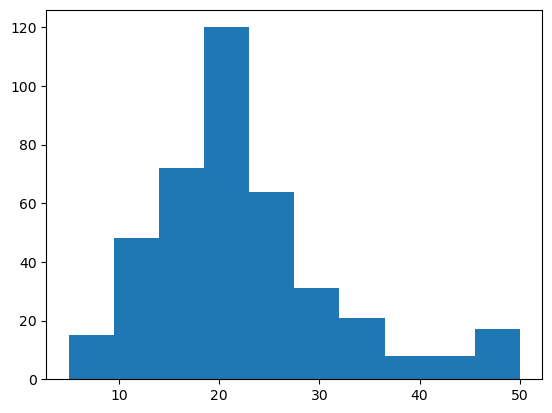

In [9]:
# Solution
import matplotlib.pyplot as plt
plt.hist(y_train)
plt.show()

**[2.6]** Plot the histogram for the target variable of the testing set using matplotlib

In [10]:
# Placeholder for student's code (Python code)

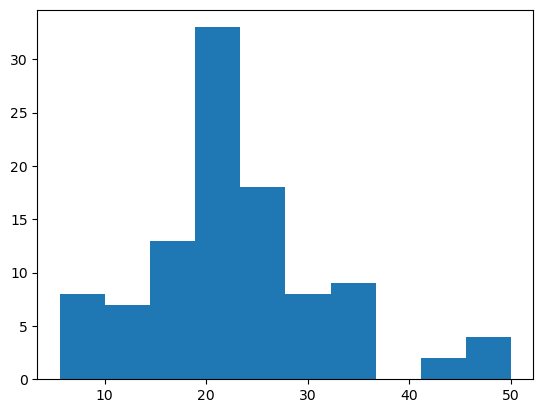

In [11]:
# Solution
plt.hist(y_test)
plt.show()

### 3.   Preparing the Dataset

**[3.1]** Standardize the features for both the training and testing sets. We will use the [.scale()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) method from scikit-learn

In [12]:
# Placeholder for student's code (Python code)

In [13]:
# Solution
from sklearn.preprocessing import scale

scaled_X_train = scale(X_train)
scaled_X_test = scale(X_test)

**[3.2]** Print the scaled version of the first observation of the training set

In [14]:
# Placeholder for student's code (Python code)

In [15]:
# Solution
print(scaled_X_train[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


### 4.   Defining the Architecture of the Multi-Layer Perceptron

**[4.1]** Import tensorflow and numpy

In [16]:
# Placeholder for student's code (Python code)

In [17]:
# Solution
import tensorflow as tf
import numpy as np

**[4.2]** Set the seeds for tensorflow, keras and numpy in order to get reproducible results

In [18]:
# Placeholder for student's code (Python code)

In [19]:
# Solution
tf.random.set_seed(42)

**[4.3]** Instantiate a [.Sequential()](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) class and called it `model`

In [20]:
# Placeholder for student's code (Python code)

In [21]:
# Solution
model = tf.keras.Sequential()

**[4.4]** Import the [Dense()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) class (i.e. fully connected layer)

In [22]:
# Placeholder for student's code (Python code)

In [23]:
# Solution
from tensorflow.keras.layers import Dense

**[4.5]** Create a hidden layer of 128 fully connected neurons and use ReLU as the activation function.

**Note**: For any Neural Network in TensorFlow, we need to specify the shape of the inputs to the first layer with the parameter *input_shape*. Here the inputs will be array of 13 features.

In [24]:
# Placeholder for student's code (Python code)

In [25]:
# Solution
layer1 = Dense(128, activation='relu', input_shape=[13])

**[4.6]** Define the final layer (also called top or head) that will be responsible of making the final predictions of our regression problem.


In [26]:
# Placeholder for student's code (Python code)

In [27]:
# Solution
top_layer = Dense(1)

**[4.7]** Assemble the different layers we just defined to create our first MLP using the [.add()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/add) method

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution
model.add(layer1)
model.add(top_layer)

**[4.8]** Configure the learning process using the [.compile()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#methods_2) method and specify the loss function, optimizer (here Adam) and the metrics to be displayed.

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

**[4.9]** Print the architecture of this model with [.summary()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary)

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution
model.summary()

### 5. Training and Evaluation of the Model

**[5.1]** Train the model with the [.fit()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method on the training set for 50 epochs and split the data into a validation set (20% of the data)

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution
history = model.fit(scaled_X_train, y_train, epochs=50, validation_split = 0.2)

**[5.2]** Evaluate the performance of this model on the testing set using [.evaluate()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution
model.evaluate(scaled_X_test, y_test)

### 6. Analysing the Results

**[6.1]** Plot the learning curve for MSE on the training and validation sets. We will use the [.plot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) method to create a line chart.

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution
plt.plot(history.history['mse'], label='MSE training')
plt.plot(history.history['val_mse'], label='MSE validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

**[6.2]** Using the trained model, predict the outcome of the first observation from the training set

Note: This method is expecting the first dimension of the input to be the number of batch (we can provide more than one input) so we need to reshape the input to shape (1, 13) using [.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution
model.predict(scaled_X_test[0].reshape((1, 13)))

**[6.3]** Compare this with the actual value for this observation

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution
y_test[0]

**[6.4]** Save the entire model (architecture and weights)

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution
model.save('../models/tf_reg')

### 7.   Push changes

**[7.1]** Add you changes to git staging area

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git add .

**[7.2]** Create the snapshot of your repository and add a description

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git commit -m "first tf model"

**[7.3]** Push your snapshot to Github

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git push

**[7.4]** Go to Github and merge the branch after reviewing the code and fixing any conflict


**[7.5]** Check out to the master branch

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git checkout master

**[7.6]** Pull the latest updates

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git pull

**[7.7]** Stop the Docker container

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
docker stop adv_mla_lab_8